In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Data/TATAMOTORS.NS.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-18,518.799988,520.900024,507.100006,508.450012,506.870239,12293322
1,2023-05-19,509.799988,526.400024,504.750000,524.950012,523.318970,19343560
2,2023-05-22,524.950012,527.000000,519.349976,522.500000,520.876587,9978339
3,2023-05-23,522.500000,531.000000,521.150024,528.500000,526.857971,12256902
4,2023-05-24,527.150024,529.650024,519.150024,520.200012,518.583740,7648284


In [128]:
df['Date'] = pd.to_datetime(df['Date'])

<Axes: xlabel='Date'>

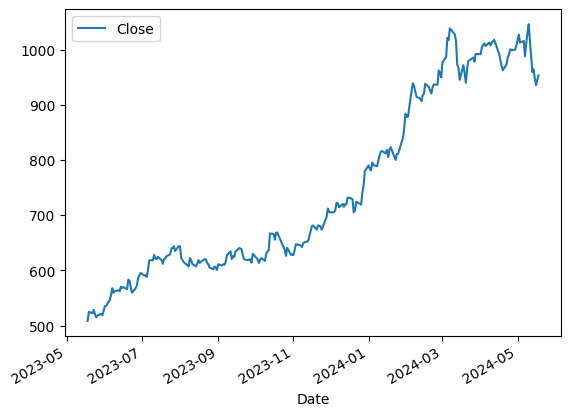

In [129]:
df.plot(x='Date', y='Close')

<Axes: >

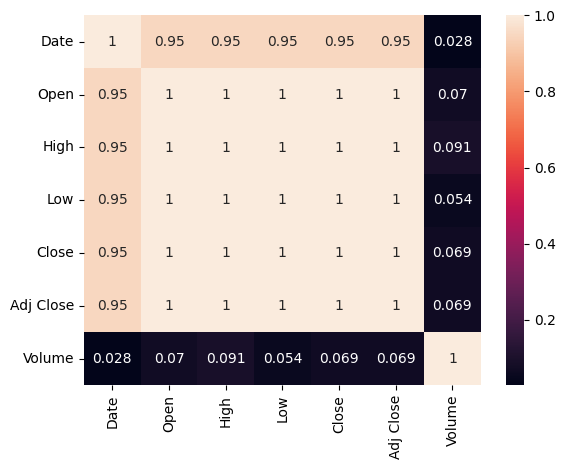

In [130]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [131]:
df1 = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [132]:
for i in range(len(df1)):
  if (i >= 3):
    df1.loc[i, 'Prev_1'] = df1.iloc[i - 3]['Close']
    df1.loc[i, 'Prev_2'] = df1.iloc[i - 2]['Close']
    df1.loc[i, 'Prev_3'] = df1.iloc[i - 1]['Close']

In [133]:
df1.drop(df1.index[0:3], inplace=True)

In [134]:
df1.rename(columns={'Close': 'Estimate'}, inplace=True)

In [135]:
Dates = df1['Date']
X = df1.drop(['Estimate', 'Date'], axis=1)
y = df1['Estimate']

In [136]:
df1

,Date,Estimate,Prev_1,Prev_2,Prev_3
3,2023-05-23,528.500000,508.450012,524.950012,522.500000
4,2023-05-24,520.200012,524.950012,522.500000,528.500000
5,2023-05-25,514.849976,522.500000,528.500000,520.200012
6,2023-05-26,518.450012,528.500000,520.200012,514.849976
7,2023-05-29,521.450012,520.200012,514.849976,518.450012
...,...,...,...,...,...
242,2024-05-14,964.650024,1030.300049,1046.650024,959.750000
243,2024-05-15,947.299988,1046.650024,959.750000,964.650024
244,2024-05-16,936.400024,959.750000,964.650024,947.299988
245,2024-05-17,945.700012,964.650024,947.299988,936.400024


In [137]:
X = X.values.reshape(len(df1), 3, 1)

In [138]:
y = y.values.reshape(len(df1), 1)

In [139]:
p80 = int(len(df1) * 0.8)
p90 = int(len(df1) * 0.9)

Date_train, X_train, y_train = Dates[:p80], X[:p80], y[:p80]
Date_val, X_val, y_val = Dates[p80: p90], X[p80: p90], y[p80: p90]
Date_test, X_test, y_test = Dates[p90:], X[p90:], y[p90:]

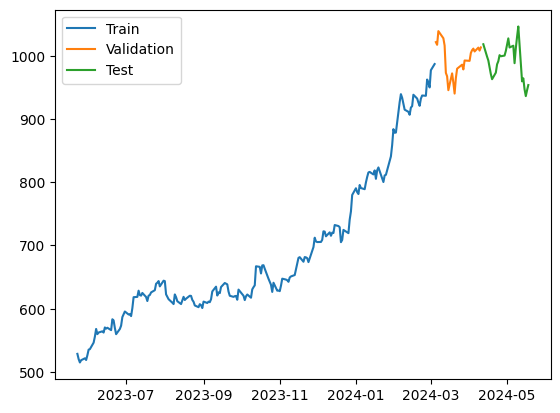

In [140]:
plt.plot(Date_train, y_train)
plt.plot(Date_val, y_val)
plt.plot(Date_test, y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(LSTM(64, input_shape=(X_train.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64, input_shape=(X_train.shape[1:])))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(16, activation="relu"))

model.add(Dense(1))

opt = Adam(learning_rate=0.001)

model.compile(loss='mse',
              optimizer=opt, metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 336ms/step - loss: 484765.8125 - mean_absolute_error: 686.9173 - val_loss: 987458.4375 - val_mean_absolute_error: 993.3683
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 485259.0625 - mean_absolute_error: 686.7756 - val_loss: 987289.9375 - val_mean_absolute_error: 993.2835
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 491169.6250 - mean_absolute_error: 691.0306 - val_loss: 987067.0625 - val_mean_absolute_error: 993.1714
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 481718.8750 - mean_absolute_error: 683.9313 - val_loss: 986807.3125 - val_mean_absolute_error: 993.0406
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 478416.9375 - mean_absolute_error: 682.0044 - val_loss: 986325.6875 - val_mean_absolute_error: 992.7980
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 495549.5625 - mean_absolute_error: 694.0177 - val_loss: 985638.2500 - val_mean_absolute_error: 992.4518
Epoch 7/500
7/7 ━━━━━━━━━━

In [142]:
train_predictions = model.predict(X_train).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step


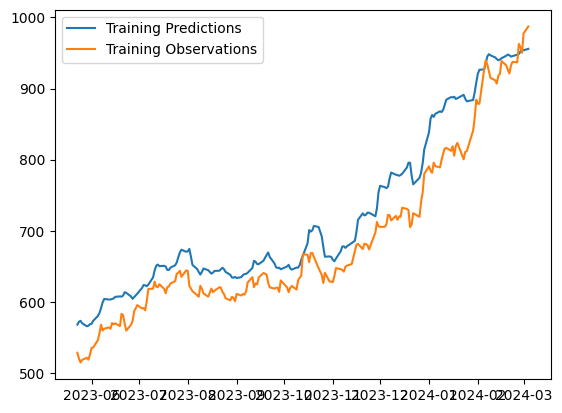

In [143]:
plt.plot(Date_train, train_predictions)
plt.plot(Date_train, y_train.flatten())
plt.legend(['Training Predictions', 'Training Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


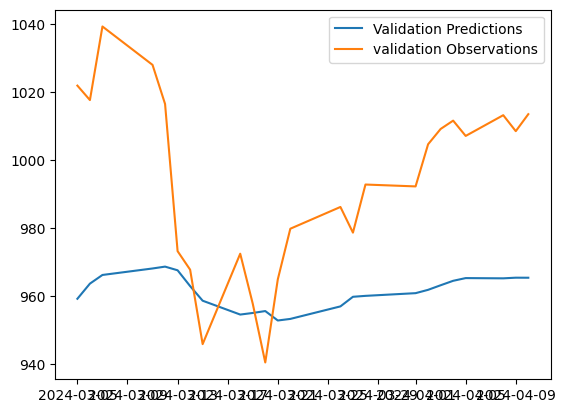

In [144]:
val_predictions = model.predict(X_val).flatten()
plt.plot(Date_val, val_predictions)
plt.plot(Date_val, y_val.flatten())
plt.legend(['Validation Predictions', 'validation Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


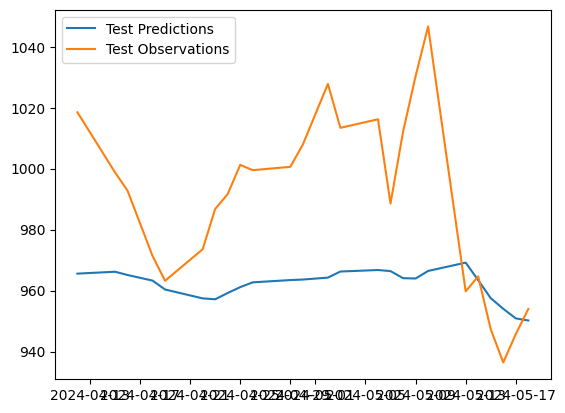

In [145]:
test_predictions = model.predict(X_test).flatten()
plt.plot(Date_test, test_predictions)
plt.plot(Date_test, y_test.flatten())
plt.legend(['Test Predictions', 'Test Observations'])

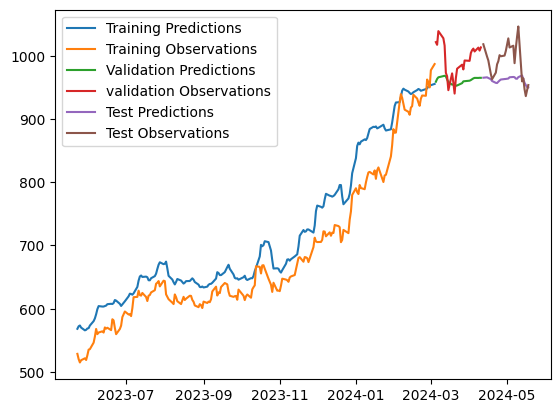

In [146]:
plt.plot(Date_train, train_predictions)
plt.plot(Date_train, y_train.flatten())
plt.plot(Date_val, val_predictions)
plt.plot(Date_val, y_val.flatten())
plt.plot(Date_test, test_predictions)
plt.plot(Date_test, y_test.flatten())
plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'validation Observations', 'Test Predictions', 'Test Observations'])

In [147]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 3), y_train)
reg.score(X_train.reshape(-1, 3), y_train)
reg.coef_
reg.intercept_

array([-4.14998022])

In [148]:
reg_val_predictions = reg.predict(X_val.reshape(-1, 3))
reg_train_predictions = reg.predict(X_train.reshape(-1, 3))
reg_test_predictions = reg.predict(X_test.reshape(-1, 3))

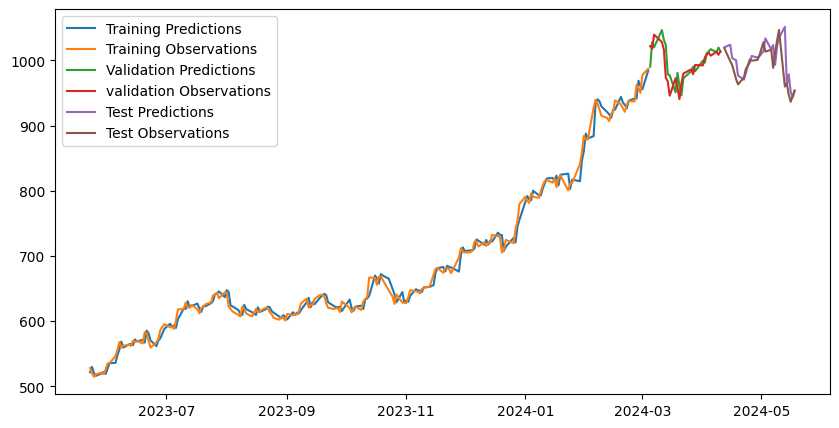

In [149]:
plt.figure(figsize=(10, 5))
plt.plot(Date_train, reg_train_predictions)
plt.plot(Date_train, y_train.flatten())
plt.plot(Date_val, reg_val_predictions)
plt.plot(Date_val, y_val.flatten())
plt.plot(Date_test, reg_test_predictions)
plt.plot(Date_test, y_test.flatten())
plt.legend(['Training Predictions', 'Training Observations', 'Validation Predictions', 'validation Observations', 'Test Predictions', 'Test Observations'])

In [150]:
dfx = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Date'], axis=1)

In [151]:
dfx.describe()

,Close
count,247.000000
mean,743.994334
std,162.617728
min,508.450012
25%,618.675018
50%,671.549988
75%,926.574982
max,1046.650024


In [152]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dfx['Close'])
print('ADF Stats:', result[0])
print('p-value: ',  result[1])

ADF Stats: -0.7859899396807458
p-value:  0.82320281664285


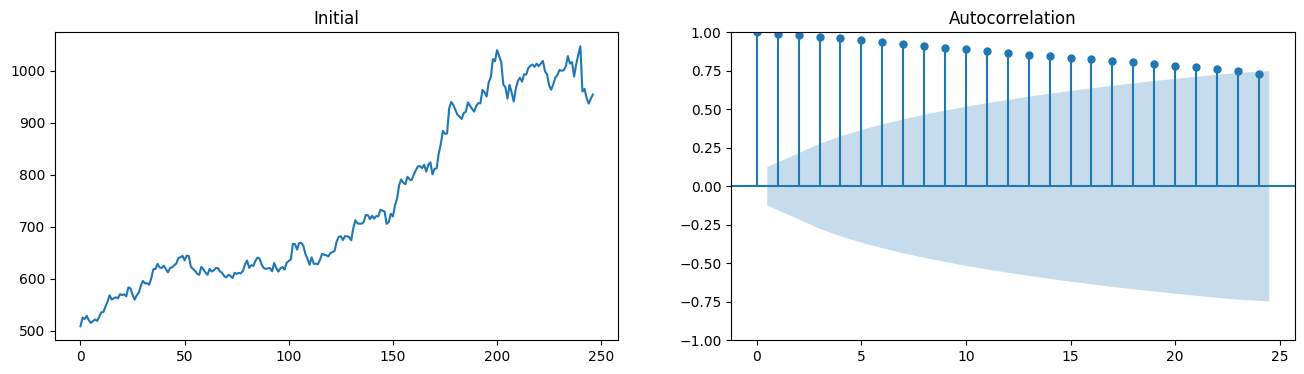

In [153]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(dfx.Close)
ax1.set_title('Initial')
plot_acf(dfx.Close, ax=ax2);

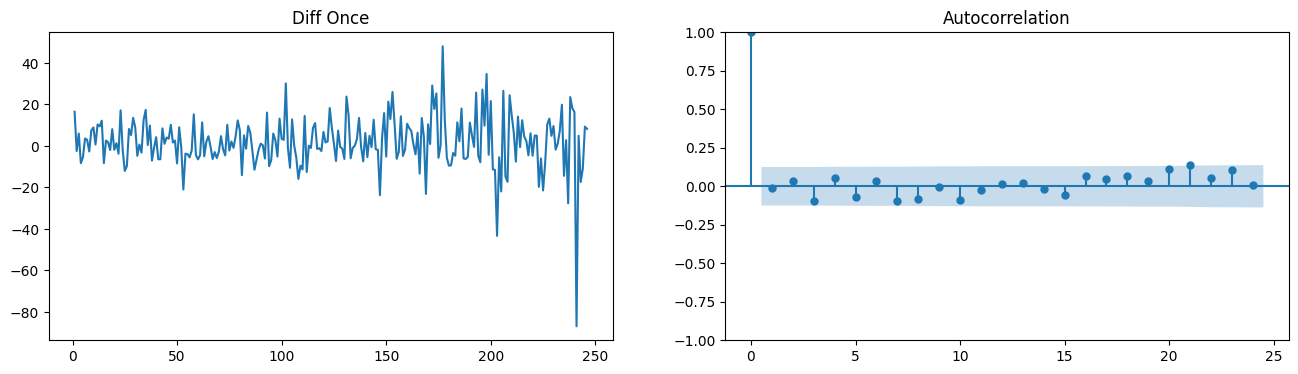

In [154]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Diff Once')
plot_acf(diff, ax=ax2);

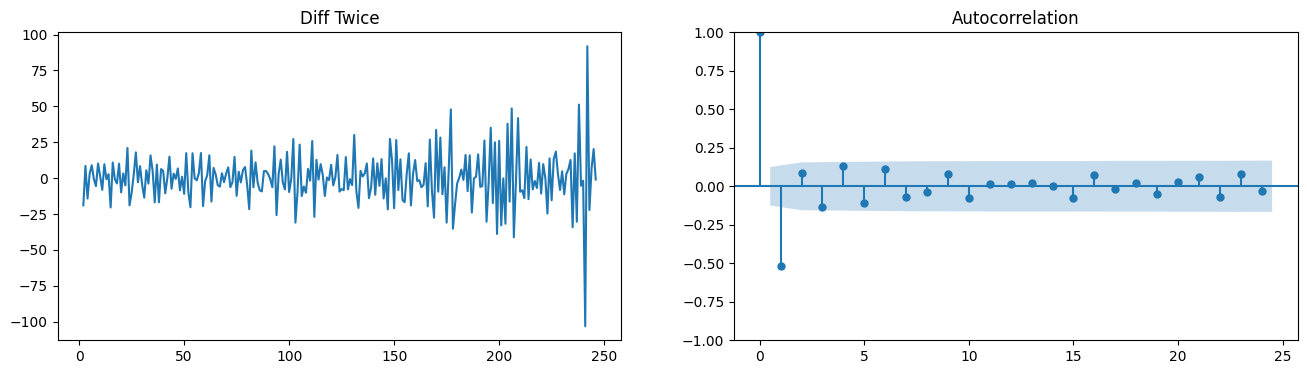

In [155]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Diff Twice')
plot_acf(diff, ax=ax2);

In [156]:
!pip install pmdarima

In [157]:
from pmdarima.arima.utils import ndiffs

ndiffs(df.Close, test='adf')

1

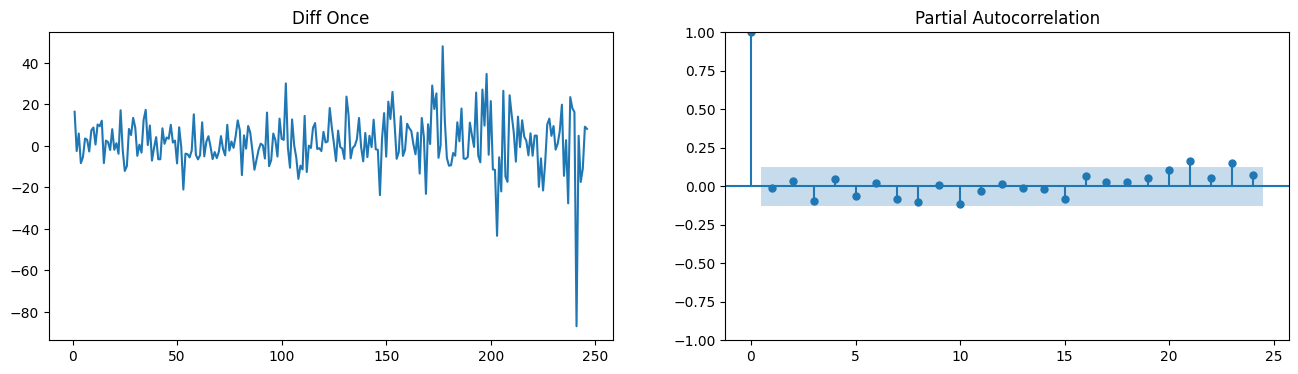

In [158]:
diff = dfx.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Diff Once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

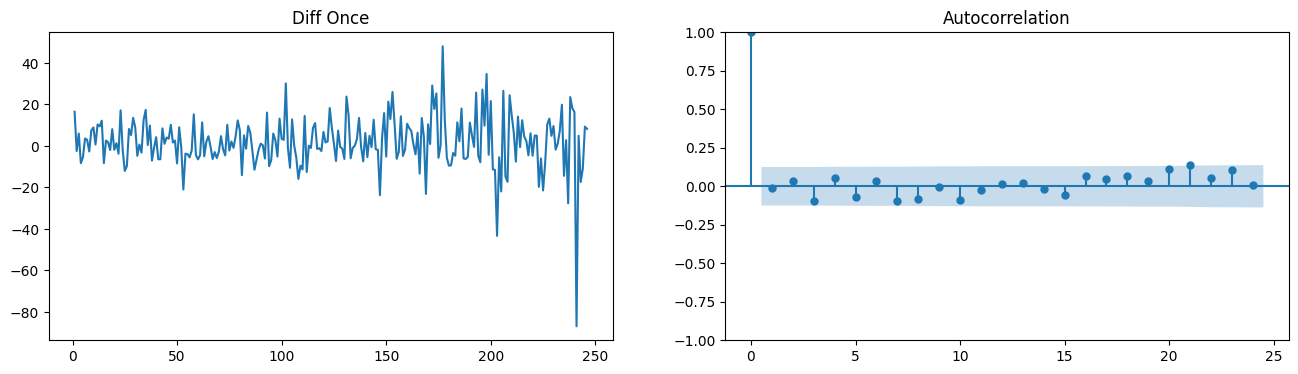

In [159]:
diff = dfx.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('Diff Once')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [160]:
dfx80 = dfx[:p80]

In [161]:
dfx80

,Close
0,508.450012
1,524.950012
2,522.500000
3,528.500000
4,520.200012
...,...
190,932.299988
191,937.400024
192,936.950012
193,962.700012


In [162]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dfx80.Close, order=(3, 1, 3))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [163]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  195
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -718.563
Date:                Thu, 22 Aug 2024   AIC                           1451.126
Time:                        18:50:19   BIC                           1474.001
Sample:                             0   HQIC                          1460.389
                                - 195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2755      0.070     -3.942      0.000      -0.413      -0.139
ar.L2          0.3194      0.068      4.704      0.000       0.186       0.452
ar.L3          0.9558      0.071     13.518      0.000       0.817       1.094
ma.L1          0.3194      0.088      3.626      0.000       0.147       0.492
ma.L2         -0.3405      0.086     -3.971      0.000      -0.509      -0.172
ma.L3         -0.9670      0.080    -12.017      0.000      -1.125      -0.809
sigma2        95.1634      7.910     12.031      0.000      79.660     110.667
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                50.36
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([1.84844696e-02, 1.92546559e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.62732794e-05]),
 array([-24.22168695,  29.04548295,  82.31265284, 135.57982274,
        188.84699263, 242.11416253, 295.38133242, 348.64850232,
        401.91567221, 455.18284211, 508.450012  ]),
 <BarContainer object of 10 artists>)

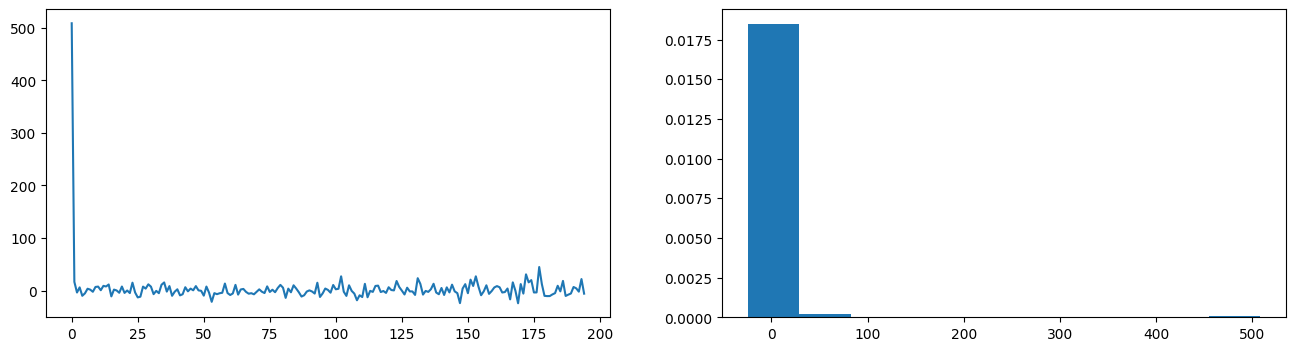

In [122]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [123]:
dfx['New_index'] = dfx.index + 1

In [124]:
dfx.set_index("New_index", inplace=True)

In [125]:
dfx

,Close
New_index,
1,508.450012
2,524.950012
3,522.500000
4,528.500000
5,520.200012
...,...
243,964.650024
244,947.299988
245,936.400024


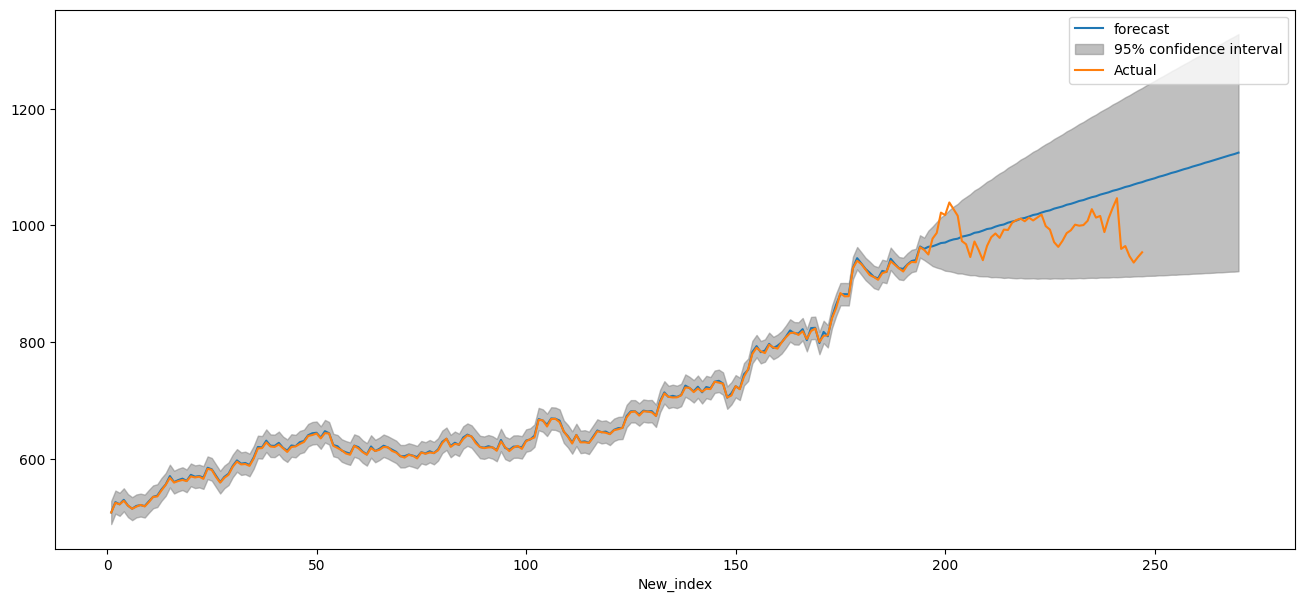

In [126]:
from statsmodels.graphics.tsaplots import plot_predict


fig ,ax = plt.subplots(1, figsize=(16, 7))
plot_predict(result, start=1, end= 270, ax = ax, dynamic=False)
dfx['Close'].plot()
plt.legend(['forecast', '95% confidence interval', 'Actual'])